In [4]:
import load_data 
import run_network
import network 
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2 as cv
import os
from torch import nn, optim
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from skimage.measure import compare_ssim as ssim
import csv
%matplotlib inline

In [5]:
result_path = './result/'
inputs_nums = [25,50,75,100,125,150,175]
test_image_num = 4
psnr_ssim_file_name = 'result_psnr_ssim.csv'

In [27]:
def show_data(result_path,file_name):
    assert os.path.isfile(os.path.join(result_path,file_name))
    myfile = open(os.path.join(result_path,file_name),'r')
    PSNR_VALUE=[]
    SSIM_VALUE=[]
    with myfile:
        csv_reader = csv.reader(myfile)
        for row in csv_reader:
            tmp = row[2:]
            if row[0] == 'psnr':
                PSNR_VALUE.append(np.double(tmp))
            elif row[0] == 'ssim':
                SSIM_VALUE.append(np.double(tmp))
            else:
                assert 0==1
    
    PSNR_VALUE = np.asarray(PSNR_VALUE)    
    SSIM_VALUE = np.asarray(SSIM_VALUE) 
    
    return PSNR_VALUE,SSIM_VALUE
    
#     plot_data(PSNR_VALUE,SSIM_VALUE)


In [28]:
PSNR,SSIM = show_data(result_path,file_name=psnr_ssim_file_name)

(7, 4)
[[ 20.4194  16.4468  22.7797  11.5375]
 [ 22.366   17.5206  22.5482  11.2461]
 [ 23.1164  17.993   22.7655  13.6857]
 [ 23.7602  17.8957  23.3402  13.1097]
 [ 20.4919  17.4387  20.4701  10.2105]
 [ 21.5465  17.3893  20.9433  11.1774]
 [ 20.8852  16.593   22.6148  10.103 ]]
[ 17.79585   18.420225  19.39015   19.52645   17.1528    17.764125  17.549   ]


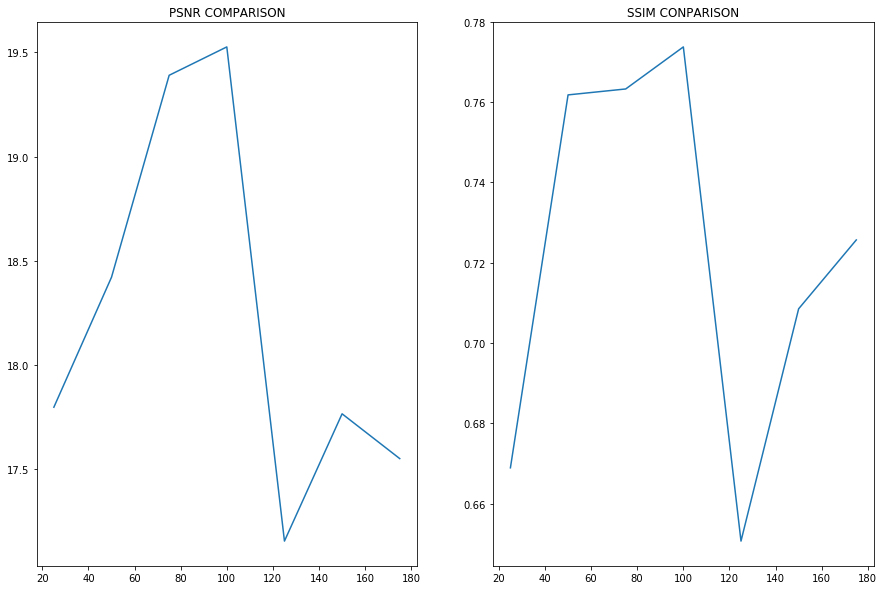

In [34]:
print(PSNR.shape)
print(PSNR)
PSNR_MEAN = np.mean(PSNR,axis=1)
print(PSNR_MEAN)
SSIM_MEAN = np.mean(SSIM,axis=1)
plt.figure(figsize=(15,10))
# plt.suptitle('PSNR COMPARISON', fontsize=50)
plt.subplot(1,2,1)
plt.plot(inputs_nums,PSNR_MEAN)
plt.title('PSNR COMPARISON')
plt.subplot(1,2,2)
plt.plot(inputs_nums,SSIM_MEAN)
plt.title('SSIM CONPARISON')

In [14]:
# def plot_data(PSNR,SSIM):
#     plt.figure(figsize=(20,10))
#     plt.suptitle('PSNR COMPARISON', fontsize=50)
#     plt.subplot(221)
#     plt.plot(inputs_nums,np.mean(PSNR,axis=0))
#     plt.title('test image 1')
#     plt.subplot(222)
#     plt.plot(inputs_nums,PSNR[:,1])
#     plt.title('test image 2')
#     plt.subplot(223)
#     plt.plot(inputs_nums,PSNR[:,2])
#     plt.title('test image 3')
#     plt.subplot(224)
#     plt.plot(inputs_nums,PSNR[:,3])
#     plt.title('test image 4')


#     plt.figure(figsize=(20,10))
#     plt.suptitle('SSIM COMPARISON', fontsize=50)
#     plt.subplot(221)
#     plt.plot(inputs_nums,SSIM[:,0])
#     plt.title('test image 1')
#     plt.subplot(222)
#     plt.plot(inputs_nums,SSIM[:,1])
#     plt.title('test image 2')
#     plt.subplot(223)
#     plt.plot(inputs_nums,SSIM[:,2])
#     plt.title('test image 3')
#     plt.subplot(224)
#     plt.plot(inputs_nums,SSIM[:,3])
#     plt.title('test image 4')


TypeError: cannot perform reduce with flexible type

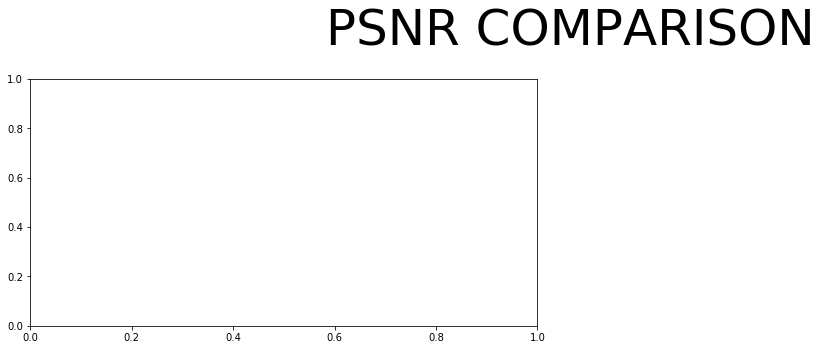

In [15]:
show_data(result_path,file_name=psnr_ssim_file_name)

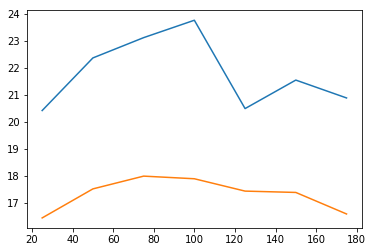

In [5]:
plt.plot(inputs_nums,PSNR[:,0],inputs_nums,PSNR[:,1])

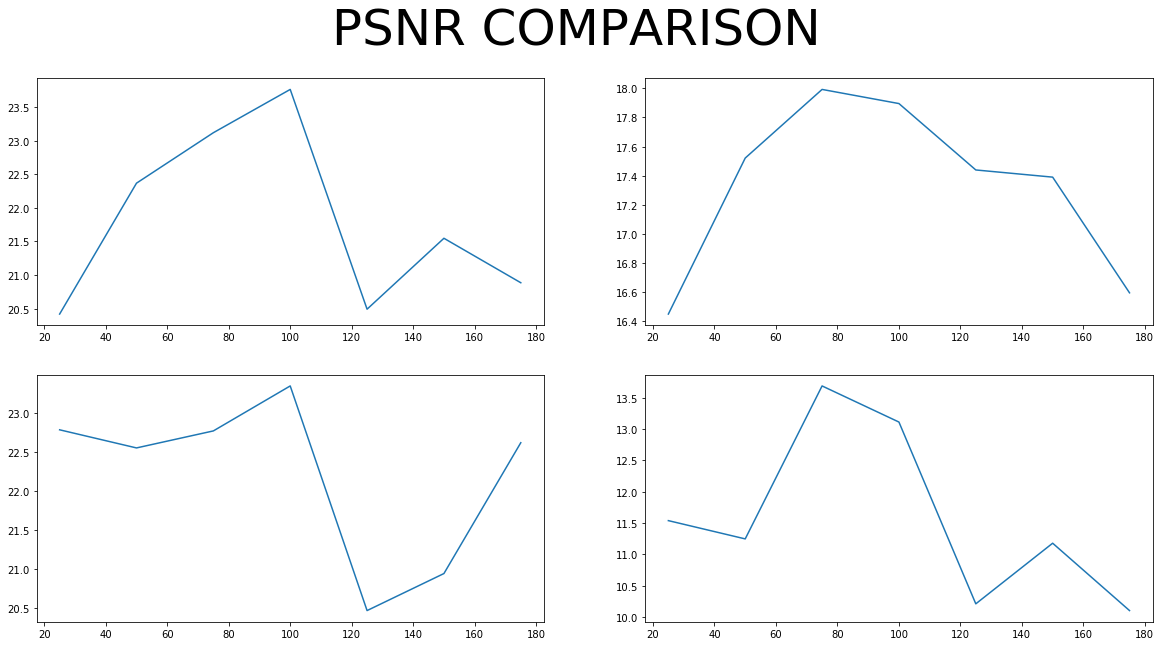

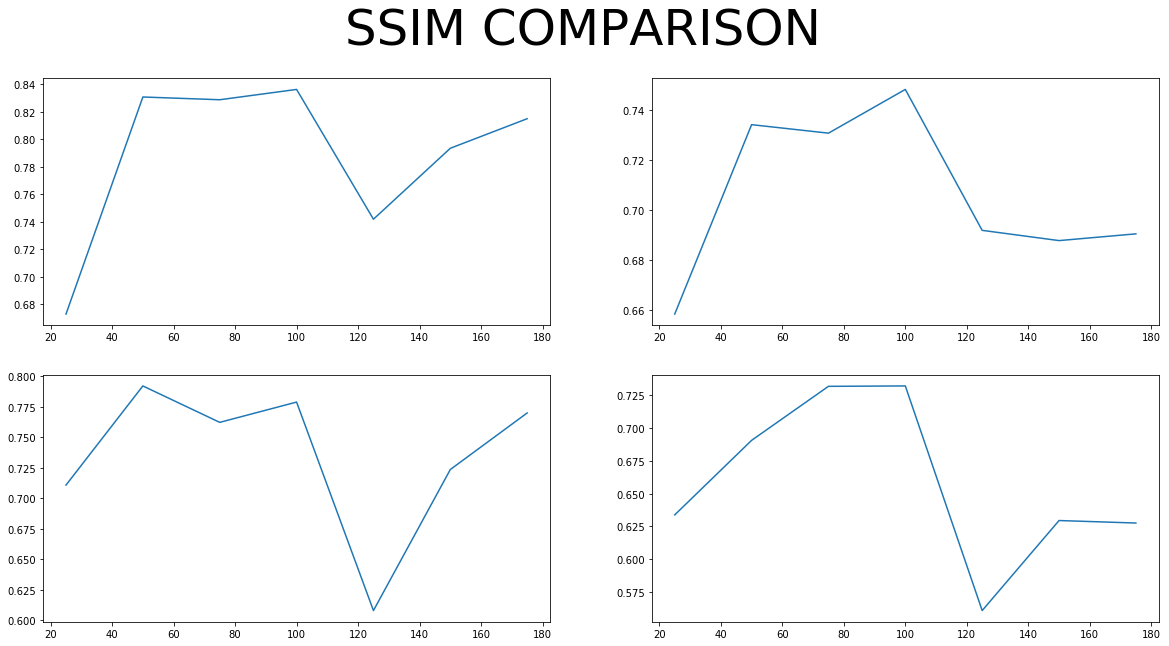

In [14]:
plt.figure(figsize=(20,10))
plt.suptitle('PSNR COMPARISON', fontsize=50)
plt.subplot(221)
plt.plot(inputs_nums,PSNR[:,0])
plt.subplot(222)
plt.plot(inputs_nums,PSNR[:,1])
plt.subplot(223)
plt.plot(inputs_nums,PSNR[:,2])
plt.subplot(224)
plt.plot(inputs_nums,PSNR[:,3])


plt.figure(figsize=(20,10))
plt.suptitle('SSIM COMPARISON', fontsize=50)
plt.subplot(221)
plt.plot(inputs_nums,SSIM[:,0])
plt.subplot(222)
plt.plot(inputs_nums,SSIM[:,1])
plt.subplot(223)
plt.plot(inputs_nums,SSIM[:,2])
plt.subplot(224)
plt.plot(inputs_nums,SSIM[:,3])
